<h1>ITNPDB2 Representing and Manipulating Data</h1>
<h3>University of Stirling<br>Dr. Saemundur Haraldsson</h3>

<h1>Maths and Stats Overview</h1>
<ul>
    <li>Maths functions</li>
        <ul>
        <li>Basic useful functions</li>
        <li>Be aware of handling numbers, not everything is as it seems</li>
        </ul>
    <li>SciPy</li>
        <ul>
            <li>Random numbers</li>
            <ul>
                <li>Different distributions</li>
                <li>Seeds -- for reproducability</li>
            </ul>
            <li>Statistics</li>
        </ul>
    
</ul>
<p>Note this notebook assumes Pyton 2.7 and Numpy 1.16<br>
This will definitely not work with Python 3 as is and might need a few adjustments to work as described with Numpy 1.17    
</p>

# Mathematics functions

In [1]:
# First we need to import the modules we'll need in this lecture
import math
import numpy

<h2> Let's have a look at a couple of basic useful functions</h2>
<p> Some functions, constants and methods are available across multiple packages<br>
    For example there's overlap between:
    <ul>
        <li>Builtins <a href="https://docs.python.org/2/library/functions.html">Documentation</a></li>
        <li>The math module <a href="https://docs.python.org/2.7/library/math.html">Documentation</a></li>
        <li>Numpy <a href="https://numpy.org/doc/1.16/reference/index.html">Documentation</a> (most functions here apply to arrays as well)</li>
    </ul>
    sometimes with a slightly different implementation.<br>
    They don't always provide the same answer and sometimes it is <strong>not at all obvious</strong>
</p>

<h3>These functions are always the same regardless of the package of their origin</h3>
<ul>
    <li>To get the absolute value<br>
    abs(), fabs()</li>
    <li>Just regular round<br> 
    round() (in Numpy it's round_())</li>
    <li>To round up to next integer<br>
        ceil()</li>
    <li>To round down to next integer<br>floor()</li>
    <li>To truncate (same as floor() really)<br>trunc()</li>
    <li>Determine the minimum value<br>min()</li>
    <li>Determine the maximum value<br>max()</li>
    <li>Determine the square root of a number<br>sqrt()</li>
    <li>Determine the exponent<br>exp()</li>
    <li>Determine the logarithm<br>log()</li>
    <li>Raise X to the power of Y<br>pow() or **</li>
    <li>Determine the modulo of two values or commonly known as remainder<br>mod() or %</li>
</ul>
<p>Then there are of course a few special numbers</p>

In [2]:
# Define a couple of variables that we'll need to demonstrate
X = 12.4
Y = 13.6
Z = -6.21

# If you want the absolute value use abs or fabs
print(u'Absolute value of {} is '.format(Z), math.fabs(Z))

# To round up use ceil
print(u'math.ceil({}) ='.format(X),math.ceil(X))

# To round down use floor
print(u'math.floor({}) ='.format(Y),math.floor(Y))

# To truncate use trunc
print(u'math.trunc({}) ='.format(X),math.trunc(X))

# To determine the minimun and maximum value
print(u'min([X,Y,Z]) = ',min([X,Y,Z]))
print(u'max([X,Y,Z]) = ',max([X,Y,Z]))

# Determine the square root and exponent
print(u'math.sqrt(128) =',math.sqrt(128))
print(u'math.exp(4) =',math.exp(4))

# Determine the logarithm
print(u'Natural logarithm (base e) is math.log(4) =',math.log(4))
print(u'Logarithm with base 2 is math.log(4,2) =',math.log(4,2))

# Raise to a power
print(u'math.pow(2,8) = ',math.pow(2,8))

# Modulo returns the remainder of a division and is handy for conditions
# E.g. Does is the index or counter divisable by 2, i.e. is it an even number?
for ind in range(5):
    if math.fmod(ind,2):
        print(ind, u' is odd')
    else:
        print(ind, u' is even')

# special constants
#print(u'\u03C0 = {:.20f}'.format(math.pi)) #unicode is explicitly stated
#print(u'e = {:.20f}'.format(math.e)) #unicode is explicitly stated
print('\u03C0 = {:.20f}'.format(math.pi)) #unicode not explicitly stated
print('e = {:.20f}'.format(math.e)) #unicode not explicitly stated

Absolute value of -6.21 is  6.21
math.ceil(12.4) = 13
math.floor(13.6) = 13
math.trunc(12.4) = 12
min([X,Y,Z]) =  -6.21
max([X,Y,Z]) =  13.6
math.sqrt(128) = 11.313708498984761
math.exp(4) = 54.598150033144236
Natural logarithm (base e) is math.log(4) = 1.3862943611198906
Logarithm with base 2 is math.log(4,2) = 2.0
math.pow(2,8) =  256.0
0  is even
1  is odd
2  is even
3  is odd
4  is even
π = 3.14159265358979311600
e = 2.71828182845904509080


<h3>Be aware!</h3>
<p>Numbers can be deceiving</p>
<p> The accuracy, precision and representation can depend on:</p> 
<ul>
    <li>the language version (2.x, 3.x)</li>
    <li>the OS (Windows, Linux, MacOs)</li>
    <li>hardware (sometimes)</li>
</ul>


In [3]:
# Modulo is not always equal
print(-1e100 % 1e100)
print(math.fmod(-1e100,1e100))

# and neither is the power
# math.pow() changes both arguments to float while ** does not
# Doesn't matter for simple things but might when pose problems when debugging
print(math.pow(2,3))
print(2**3)


0.0
-0.0
8.0
8


<h4> The <strong>sum</strong> function is especially problematic</h4>
<p>... when dealing with floats or very large integers</p>
<p> The builtin <i>sum</i> and <i>fsum</i> from math handle floating point precision differently</p>

In [4]:
# When do they start to differ?
for a in range(1,100):
    the_list = [.1 for i in range(a)]
    builtin_sum = sum(the_list)
    math_fsum = math.fsum(the_list)
    if not builtin_sum == math_fsum:
        print(u'They start differing on this one:', the_list)
        break
print(u'But do they really?')
print(u'sum returns: ',builtin_sum)
print(u'math.fsum returns: ',math_fsum)
print(u'is that the same? ',builtin_sum == math_fsum)
# So what is happening?
print(builtin_sum.__repr__())
print(math_fsum.__repr__())
#For accurate calculations, consider rounding, either at every calculation, or at the very end as below
print("")
print(1e+308)
print("")
print(2e+308)

They start differing on this one: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
But do they really?
sum returns:  0.6
math.fsum returns:  0.6000000000000001
is that the same?  False
0.6
0.6000000000000001

1e+308

inf


<h1>SciPy <a href="https://www.scipy.org/">(documentation)</a></h1>
<ul>
    <li>is an ecosystem of open-source software for mathematics, science, and engineering</li>
    <li>Includes many packages, e.g.:</li>
    <ul>
        <li>Numpy<br>for when you are handling N-dimensional data</li>
        <li>SciPy Library<br>for when you need basic scientific computations and statistics</li>
        <li>Pandas<br>for when you are working with data structures like dataframes </li>
        <li>Matplotlib<br>for plotting and visualisation</li>
    </ul>
   
</ul>

<h2>Random numbers</h2>
<h3>How to generate them<br>
    We can use the <strong>random</strong> package or SciPy.stats 
</h3>


In [7]:
# Import modules and packages that we'll need
import random
import matplotlib
import matplotlib.pyplot as plt
import numpy

from scipy import stats

<h2>Let's start with the random package</h2>
<a href="https://docs.python.org/2.7/library/random.html">Documentation</a>
<p>Note: This package should never be used for security purposes, there are other packages available for that.</p>
<p>The Random package is fast and handy for simple tasks and when you only need a couple of ...
    <ul>
        <li>random numbers at a time</li>
        <li>distribution options</li>
        <li> .. or can't be bothered to install SciPy</li>
    </ul>
</p>

In [8]:
# set a seed so that the lecture will be reproducable
random.seed(1234) # change this to see what happens

# The simplest first, uniform distribution
# Next random number from the range [0.0,1.0)
print(random.random())

# Usefull when you want to do something with a certain probability
for ind in range(10):
    if random.random() <= .6:
        print(u'This should print out approximately 6 times out of 10')
    else:
        print(u'And this then 4 times out of 10')

# Get a random integer between 0 and 100
print(random.randint(0,100))


# Do you want to shuffle?
A_deck_of_cards = [card for card in range(13)]
print(A_deck_of_cards)
random.shuffle(A_deck_of_cards)
print(A_deck_of_cards)

# Then I want to pick one ... but I won't take it
one_card = random.choice(A_deck_of_cards)
print(u'We picked: ',one_card)

# We could've also just used one function
one_card = random.randrange(13)
print(u'We picked: ',one_card)

# Let's pick 5 cards
five_cards = random.sample(A_deck_of_cards,5)
print(u'We picked: ',five_cards)

0.9664535356921388
This should print out approximately 6 times out of 10
This should print out approximately 6 times out of 10
And this then 4 times out of 10
And this then 4 times out of 10
This should print out approximately 6 times out of 10
And this then 4 times out of 10
This should print out approximately 6 times out of 10
And this then 4 times out of 10
This should print out approximately 6 times out of 10
This should print out approximately 6 times out of 10
100
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[2, 4, 3, 11, 6, 12, 1, 8, 7, 9, 10, 5, 0]
We picked:  11
We picked:  1
We picked:  [10, 7, 8, 4, 9]


<h2>For larger tasks and more options use SciPy.stats</h2>
<a href="https://docs.scipy.org/doc/scipy/reference/stats.html">Documentation</a>
<h3>The distributions also provide a number of convenient methods</h3>
<p>For this we'll plot the distributions with matplotlib</p>

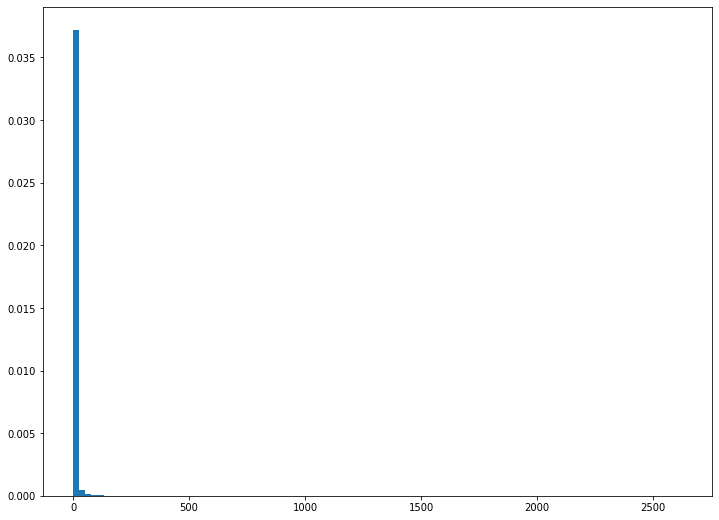

In [13]:
# Generate the data
# Comment and uncomment the following lines to see what happens
#dat = stats.expon.rvs(size=10000) 
#dat = stats.dweibull.rvs(2.07,size=10000) 
dat = stats.foldcauchy.rvs(4.72,size=10000) 
#dat = stats.gamma.rvs(1.99,size=10000) 
#dat = stats.yulesimon.rvs(11,size=10000) 
#dat = stats.trapz.rvs(0.2, 0.8, size=10000)
#dat = stats.powerlaw.rvs(1.66,size=10000) 

# plot the histogram
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.hist(dat, bins=100, density=True, histtype='stepfilled')
plt.show()

<h2>Statistics</h2>
<h3>Now that we can generate data, let's see if we can do some basic analysis on it</h3>
<p>SciPy.stats has various methods that we can use</p>
<p>First generate some data</p>

In [14]:
dat = stats.expon.rvs(size=1000)

<h3>Simple description</h3>

In [15]:
print(stats.describe(dat))
# weirdly there's no median in scipy.stats so we'll have to use numpy
print(u'Median is ',numpy.median(dat))

# A number of different means
print('Harmonic mean',stats.hmean(dat))
print('Geometric mean',stats.gmean(dat))
print('Trimmed mean',stats.tmean(dat)) #trims outliers

# Find the repeats
print(stats.find_repeats(dat))
# Which doesn't work with continuous data so we make discreet and try again
dat = stats.yulesimon.rvs(11,size=100)
print(stats.find_repeats(dat))

DescribeResult(nobs=1000, minmax=(0.0005538189193763366, 7.446581927435567), mean=0.9610674239405282, variance=0.9138385681196524, skewness=1.913842835669505, kurtosis=5.394635632567912)
Median is  0.6538685582695565
Harmonic mean 0.13613735443211322
Geometric mean 0.537860225506909
Trimmed mean 0.9610674239405282
RepeatedResults(values=array([], dtype=float64), counts=array([], dtype=int64))
RepeatedResults(values=array([1., 2.]), counts=array([92,  7]))


<h3>Frequency statistics</h3>

If you get the grade 5.5 you score higher than 66.7% of your peers
To score higher than 90% of your peers you have to get at least 6.5


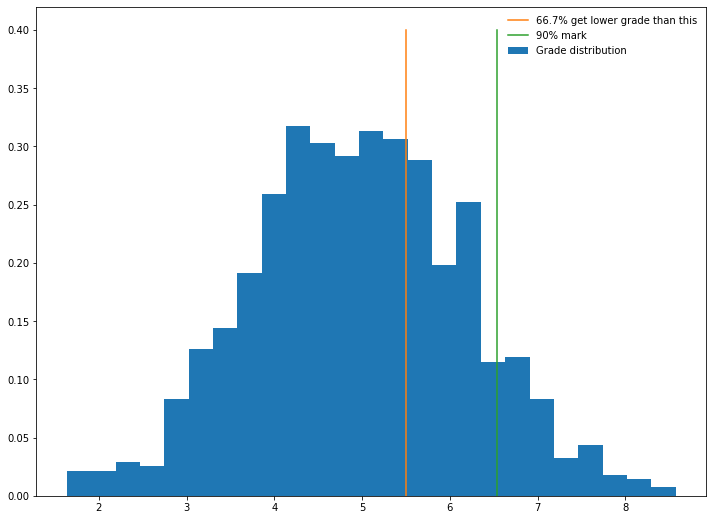

In [16]:
dat = stats.norm.rvs(loc=5,scale=1.2,size=1000)
# The only thing remodely usefull is quantile statistics
# Find out the quantile score of a given value
print('If you get the grade 5.5 you score higher than {}% of your peers'.format(stats.percentileofscore(dat,5.5)))
print('To score higher than 90% of your peers you have to get at least {:.1f}'.format(stats.scoreatpercentile(dat,90)))

# plot the histogram
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(111)
ax.hist(dat,bins=25, density=True, histtype='stepfilled',label=u'Grade distribution')
ax.plot([5.5,5.5],[0,.4],label=u'{}% get lower grade than this'.format(stats.percentileofscore(dat,5.5)))
ax.plot([stats.scoreatpercentile(dat,90),stats.scoreatpercentile(dat,90)],[0,.4],label=u'90% mark')
ax.legend(loc='best', frameon=False)
plt.show()

<h3>Statistical tests</h3>
<p>In frequency statistics we generated a normally distributed data with mean 5<br>
    Now we test to see if that's really the case with a simple t-test</p>

In [17]:
# Simple t-test
res_1samp = stats.ttest_1samp(dat,5.0)
print(res_1samp)
if res_1samp.pvalue>=.05: # 95% threshold
    print('Cannot reject null hypothesis, population mean is likely to be 5\n')
else:
    print('Can reject null hypothesis, population mean might be different from 5\n')

Ttest_1sampResult(statistic=-0.8231908664495803, pvalue=0.4105959213845539)
Cannot reject null hypothesis, population mean is likely to be 5



### T-test to see if the means of two samples is equal
### let's divide the data

In [19]:
random.shuffle(dat)
sample_1 = dat[:int(len(dat)/2)]
sample_2 = dat[int(len(dat)/2):]
print(sample_1)
print("")
print(sample_2)

[5.31223324 6.04896978 6.36999225 3.20579315 5.98459759 6.11332723
 3.42525953 5.41024101 5.23589391 4.00706006 2.97221726 2.10313144
 5.86504782 4.18021609 4.78548503 2.8363634  3.20692984 3.14700214
 4.10313023 5.17308728 4.36853285 6.26031888 3.80219848 3.91513165
 4.31797615 5.2123898  4.18683385 5.14696108 7.7781763  4.33744516
 4.29343815 5.68030461 6.67241694 4.57425959 4.27643962 6.56828603
 5.16377954 6.55330611 6.10255186 5.9515259  3.92269077 5.52319584
 5.60973411 5.42952627 4.7314671  4.03048399 5.25588725 6.14539763
 4.14909827 3.63761949 5.37355971 4.89305516 5.52403827 3.56213047
 2.94020961 5.55947588 4.28689954 6.03832616 4.99436226 4.2362175
 4.29848765 5.15185973 2.01570142 7.4195657  6.87327724 1.75107345
 4.34688474 3.98126858 6.99547267 3.90086265 5.25383089 5.11076961
 6.64490968 5.921701   3.85910641 6.46144431 5.40429632 5.07553248
 4.98621502 4.95977963 5.25469438 5.97947545 4.31366401 5.26283258
 7.40966346 3.44796115 3.83424974 6.26548686 3.39308172 4.96920

### And test

In [20]:
res_2samp = stats.ttest_ind(sample_1,sample_2)
print(res_2samp)
if res_2samp.pvalue>=.05: # 95% threshold
    print('Cannot reject null hypothesis, population means are likely to be equal\n')
else:
    print('Can reject null hypothesis, population means might be different\n')

Ttest_indResult(statistic=0.43963031048968354, pvalue=0.6603000637782128)
Cannot reject null hypothesis, population means are likely to be equal



### nonparametric -- Cannot assume normally distributed data
### Are the two samples drawn from the same distribution?

In [21]:
res_nonpara = stats.ranksums(sample_1,sample_2)
print(res_nonpara)
if res_nonpara.pvalue>=.05: # 95% threshold
    print('Cannot reject null hypothesis, samples are probably drawn from same distribution\n')
else:
    print('Can reject null hypothesis, samples might not be from same distributions\n')

RanksumsResult(statistic=0.2588338406062025, pvalue=0.7957634463447536)
Cannot reject null hypothesis, samples are probably drawn from same distribution



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=41af8bd7-a5ed-4334-a2fe-992dcc7ea742' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>